In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tweet = pd.read_csv('https://raw.githubusercontent.com/AmrutaKoshe/Twitter-US-Airline-Sentiment/main/Tweets.csv')

### View tha data

In [3]:
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
tweet.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


### Depicts the number of NaN values in a column

In [5]:
len(tweet) - tweet.count()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### Depicts % of Nan values in a column

In [6]:
(len(tweet) - tweet.count())/len(tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

### Remove features having majority NaN values 

In [7]:
del tweet['airline_sentiment_gold']
del tweet['negativereason_gold']
del tweet['tweet_coord']

In [8]:
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### count airline sentiment values

In [9]:
senti_count = tweet['airline_sentiment'].value_counts()

In [10]:
senti_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5, 1.0, 'Count of Moods')

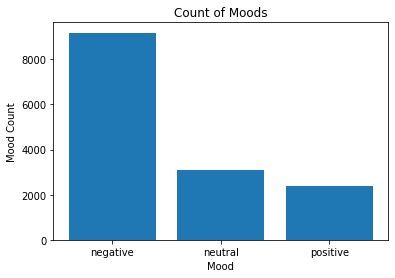

In [11]:
plt.bar(['negative','neutral','positive'], senti_count)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

### count of different airlines

In [12]:
airline_count = tweet['airline'].value_counts()

In [13]:
airline_count

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<BarContainer object of 6 artists>

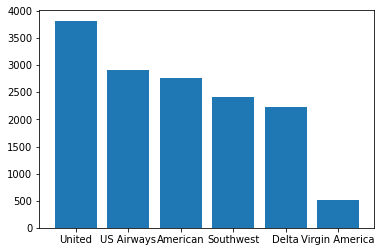

In [14]:
plt.bar(airline_count.keys(),airline_count)

### counting sentiment values in each airline

In [15]:
def plot_sub_sentiment(Airline):
  df = tweet[tweet['airline'] == Airline]
  senti = df['airline_sentiment'].value_counts()
  plt.bar(senti.keys(),senti)
  plt.title(Airline)

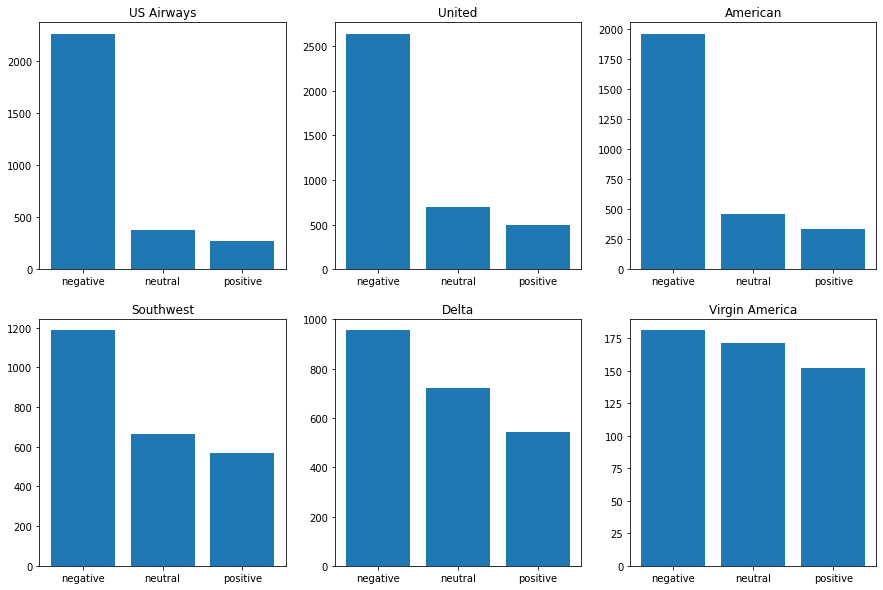

In [16]:
plt.figure(1,figsize=(15, 10))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

### negative sentiment reason count

In [17]:
NR_count = tweet['negativereason'].value_counts()
NR_count

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

Text(0.5, 0, 'reason')

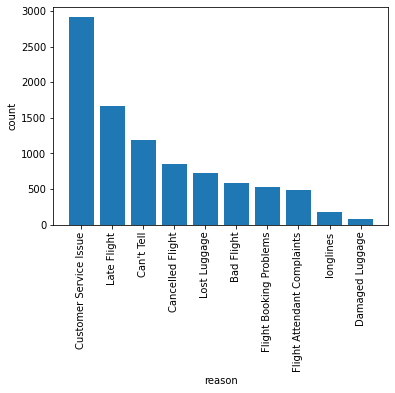

In [18]:
plt.bar(NR_count.keys(),NR_count)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.xlabel('reason')

In [19]:
def plot_sub_reason(Airline):
  df = tweet[tweet['airline'] == Airline]
  reason = df['negativereason'].value_counts()
  plt.bar(reason.keys(),reason)
  plt.xticks(rotation=90)
  plt.title(Airline)

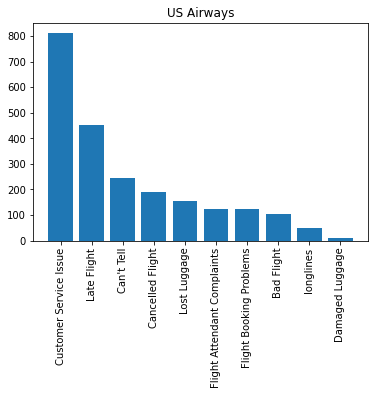

In [20]:
plot_sub_reason('US Airways')

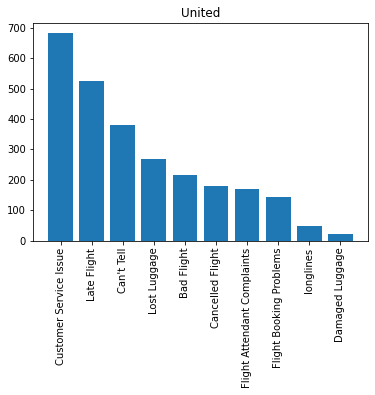

In [21]:
plot_sub_reason('United')

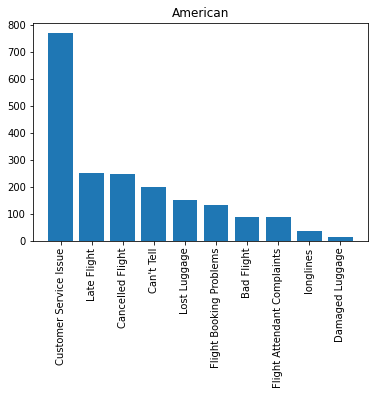

In [22]:
plot_sub_reason('American')

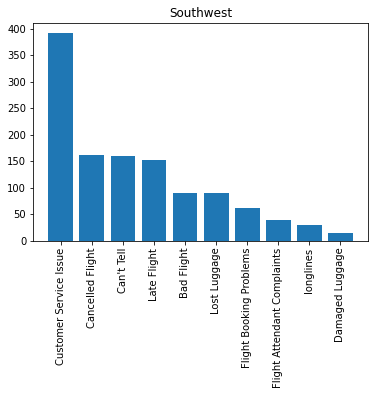

In [23]:
plot_sub_reason('Southwest')

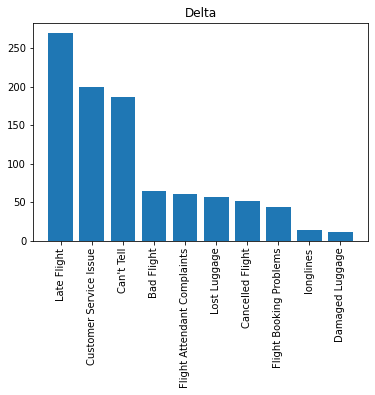

In [24]:
plot_sub_reason('Delta')

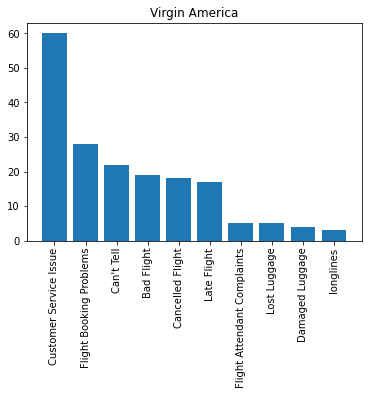

In [25]:
plot_sub_reason('Virgin America')

### popular words appearing in negative sentiment texts

In [26]:
from wordcloud import WordCloud,STOPWORDS

In [27]:
df = tweet[tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
words

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @VirginAmerica and it\'s a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it\'s been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be abl

In [28]:
clean_words = ' '.join([word for word in words.split() if "http" not in word and not word.startswith('@') and word!= 'RT'])
clean_words

'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA SFO-PDX schedule is still MIA. I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! why are your first fares in May over three times more than other carriers when all seats are available to select??? you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet status match program. I applied and it\'s been three weeks. Called and emailed with no response. What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be able 2 eat anything for next 6 hrs #fail amazing to me that we can\'t get any cold air from the vents. #VX358 #noair #worstflightever #roasted

In [29]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black',width=3000,height=2500).generate(clean_words)

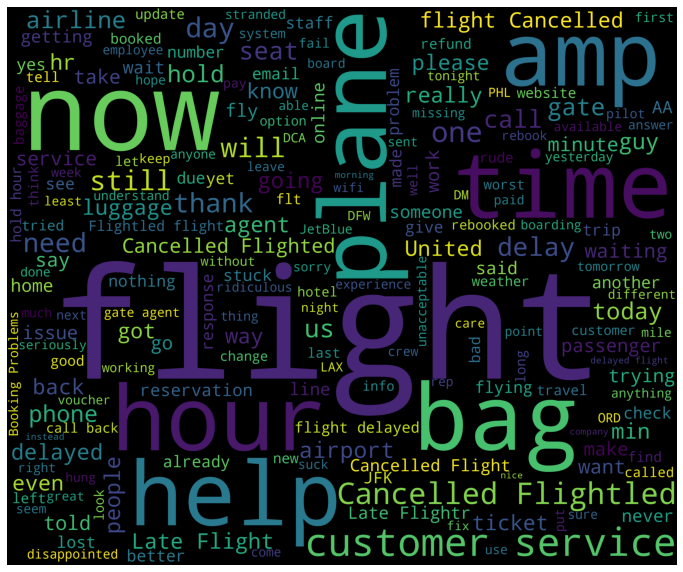

In [30]:
plt.figure(1,figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)

### cleaning the texts to remove characters, usernames and stopwords

In [31]:
import re
import nltk
from nltk.corpus import stopwords

In [32]:
def tweet_to_words(raw_tweet):
    raw_tweet = re.sub("@[\w]*", '', raw_tweet)
    words = re.sub("[^a-zA-Z]", " ",raw_tweet).lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [33]:
def clean_tweet_length(raw_tweet):
    raw_tweet = re.sub("@[\w]*", '', raw_tweet)
    words = re.sub("[^a-zA-Z]", " ",raw_tweet).lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
tweet['sentiment'] = tweet['airline_sentiment'].apply(lambda x: 0 if x =='negative' else 1)
tweet

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,NaN,NaN,1
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,Texas,NaN,0
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,1
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),0


<BarContainer object of 2 artists>

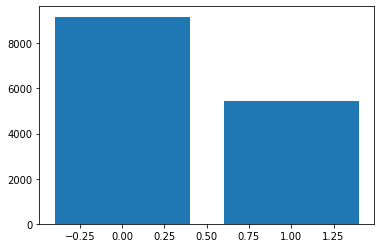

In [36]:
se = tweet['sentiment'].value_counts()
plt.bar(se.keys(),se)

### adding clean text column to the dataframe

In [37]:
tweet['clean_text'] = tweet['text'].apply(lambda x: tweet_to_words(x))

In [38]:
tweet['tweet_length']=tweet['text'].apply(lambda x: clean_tweet_length(x))

In [39]:
tweet

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment,clean_text,tweet_length
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),1,said,1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1,plus added commercials experience tacky,5
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),1,today must mean need take another trip,7
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0,really aggressive blast obnoxious entertainmen...,10
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0,really big bad thing,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,NaN,NaN,1,thank got different flight chicago,5
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,Texas,NaN,0,leaving minutes late flight warnings communica...,13
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,1,please bring american airlines blackberry,5
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),0,money change flight answer phones suggestions ...,8


In [40]:
pd.set_option("display.max_colwidth", -1)
tweet[['airline_sentiment','clean_text']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,airline_sentiment,clean_text
0,neutral,said
1,positive,plus added commercials experience tacky
2,neutral,today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainment guests faces amp little recourse
4,negative,really big bad thing
...,...,...
14635,positive,thank got different flight chicago
14636,negative,leaving minutes late flight warnings communication minutes late flight called shitty customer svc
14637,neutral,please bring american airlines blackberry
14638,negative,money change flight answer phones suggestions make commitment


### splitting train and test data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
train,test = train_test_split(tweet,test_size=0.2,random_state=42)

In [43]:
train_clean_text=[]
for tweet in train['clean_text']:
    train_clean_text.append(tweet)
test_clean_text=[]
for tweet in test['clean_text']:
    test_clean_text.append(tweet)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")

### scale the train and test data

In [45]:
train_features= v.fit_transform(train_clean_text)
test_features=v.transform(test_clean_text)

### fit models to the scaled data

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [47]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [48]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy)) 

Accuracy of LogisticRegressionis 0.6451502732240437
Accuracy of KNeighborsClassifieris 0.5935792349726776
Accuracy of SVCis 0.73224043715847
Accuracy of DecisionTreeClassifieris 0.7438524590163934
Accuracy of RandomForestClassifieris 0.8097677595628415
Accuracy of AdaBoostClassifieris 0.7503415300546448
Accuracy of GaussianNBis 0.5689890710382514


### comparing acuuracies of different models

Text(0.5, 1.0, 'Accuracies of Models')

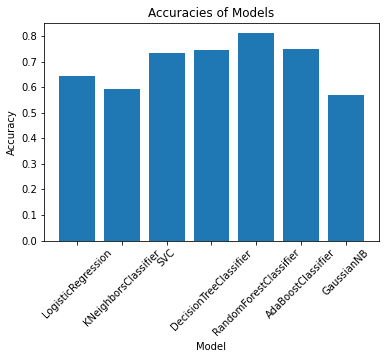

In [49]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')